# РК2 Рогозин ИУ5-61Б 

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('restaurant-scores-lives-standard.csv')

In [3]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.fillna(1)

In [5]:
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [6]:
data.isnull().sum()
# проверим есть ли пропущенные значения

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code         0
business_latitude            0
business_longitude           0
business_location            0
business_phone_number        0
inspection_id                0
inspection_date              0
inspection_score             0
inspection_type              0
violation_id                 0
violation_description        0
risk_category                0
Neighborhoods (old)          0
Police Districts             0
Supervisor Districts         0
Fire Prevention Districts    0
Zip Codes                    0
Analysis Neighborhoods       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       53973 non-null  object 
 6   business_latitude          53973 non-null  float64
 7   business_longitude         53973 non-null  float64
 8   business_location          53973 non-null  object 
 9   business_phone_number      53973 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           53973 non-null  float64
 13  inspection_type            53973 non-null  obj

In [8]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,1,1.0,1.0,1,1.415043e+10,...,New Ownership,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,1.0,1.0,1,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,1.0,1.0,1.0,1.0,1.0,1.0
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,1.0,1.0,1,1.000000e+00,...,New Ownership,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,1.0,1.0,1,1.415488e+10,...,New Construction,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,1.0,1.0,1,1.000000e+00,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
parts = np.split(data, [1,17,18], axis=1)
X = parts[0]
Y = parts[1]
G = parts[2]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', G.head())

Входные данные:

   business_id
0      101192
1       97975
2       92982
3      101389
4       85986 

Выходные данные:

   Neighborhoods (old)
0                   1
1                   1
2                   1
3                   1
4                   1


<AxesSubplot:>

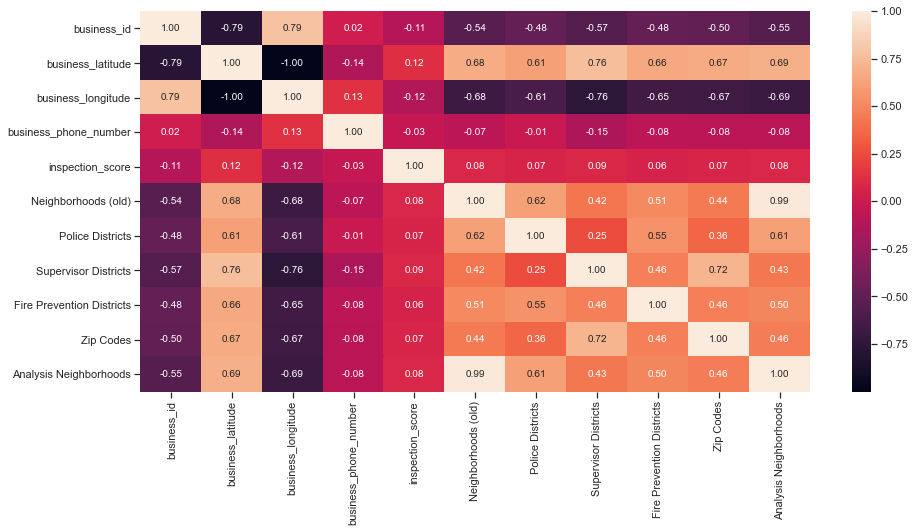

In [10]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X, G, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       business_id
24563       68773
19664        2942
37837       69759
33205       86386
42332       39606 

Входные параметры тестовой выборки:

       business_id
26331        1366
23548        2369
51798        2759
34929       90801
13447       83567 

Выходные параметры обучающей выборки:

       Neighborhoods (old)
24563                  12
19664                  41
37837                  32
33205                   1
42332                  19 

Выходные параметры тестовой выборки:

       Neighborhoods (old)
26331                  19
23548                  19
51798                   3
34929                   1
13447                   1


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [13]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

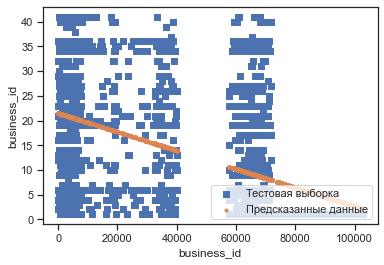

In [14]:
plt.scatter(X_test['business_id'], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test['business_id'], lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('business_id')
plt.ylabel ('business_id')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, G)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [17]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.017636161541311594
Средняя квадратичная ошибка: 0.08423860689144128
Median absolute error: 0.0
Коэффициент детерминации: 0.9994787967317088


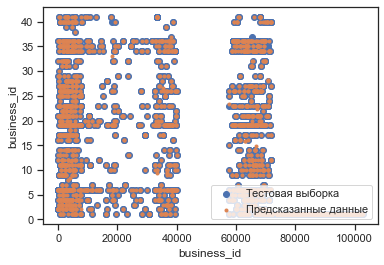

In [18]:
plt.scatter(X_test['business_id'], Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test['business_id'], Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('business_id')
plt.ylabel('business_id')
plt.show()